In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, glob
import numpy as np
from cough_inference import arr2image, get_model

In [3]:
DIR_IMGS = 'imgs'
# This is the model
mdl = 'covid_vgg19_trained_1.pkl'
imgs = glob.glob(os.path.join(DIR_IMGS, '*.npy'))
# These are images of spectrograms
imgs

['imgs/wheezes_6532.npy',
 'imgs/none_4687.npy',
 'imgs/both_6836.npy',
 'imgs/crackles_5048.npy',
 'imgs/none_5852.npy',
 'imgs/wheezes_6786.npy',
 'imgs/both_6821.npy',
 'imgs/both_6820.npy',
 'imgs/both_6835.npy',
 'imgs/crackles_5690.npy']

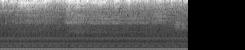

In [10]:
# The spectrogram is an array
# Load it from disk
arr = np.load(imgs[7])
# Convert to image
img = arr2image(arr)
img

In [19]:
# Deserialize the model
lrn = get_model(mdl) 
# Get predictions for the first image
cat, _, prbs = lrn.predict(img)
# The image name shows the real category
# After it we print the predicted category
# and its probability (maximum of the probability vector)
imgs[6], cat, prbs.max().item()

('imgs/both_6821.npy', Category both, 0.592654824256897)

In [14]:
# Now predict the rest of the examples
# Filename shows the real category
print('image_name', 'predicted_cat', 'probability')
print('-' * 40)
for i in imgs[1:]:
    a = np.load(i)
    im = arr2image(a)
    c, _, ps = lrn.predict(im)
    print(i, c, ps.max().item())

image_name predicted_cat probability
----------------------------------------
imgs/both_6821.npy both 0.44141432642936707
imgs/wheezes_6532.npy wheezes 0.7845106720924377
imgs/none_5852.npy wheezes 0.5016433596611023
imgs/none_4687.npy none 0.676000714302063
imgs/crackles_5690.npy crackles 0.7099245190620422
imgs/both_6835.npy both 0.5926534533500671
imgs/both_6820.npy both 0.9474961757659912
imgs/wheezes_6786.npy both 0.5224534273147583
imgs/both_6836.npy both 0.5050758123397827
